In [155]:
import numpy as np
from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm
from numpy.random import default_rng

# Question 1: Simulation (single-variate)
## 1a
Denote the PDF of uniform as $u(x)$, CDF as $U(x)$. <br>
Generate the following array or matrix:<br>
1. $a = u(x)$ where $x$ = -0.25, 0.25, 0.5, 0.75, 1.25<br>
2. $b = U(x)$ where $x$ = -0.25, 0.25, 0.5, 0.75, 1.25<br>
3. $c = U^{-1}(x)$ where $x$ = 0.25, 0.5, 0.75<br>
4. A matrix $A$ of size 3x4 containing random samples generated by uniform distribution.<br>
5. Random vector $a_{1}$ and $a_{2}$ of size 4, using seed 12345.

In [156]:
a = uniform.pdf([-0.25, 0.25, 0.5, 0.75, 1.25])
b = uniform.cdf([-0.25, 0.25, 0.5, 0.75, 1.25])
c = uniform.ppf([0.25, 0.5, 0.75])
A = uniform.rvs(size = [3, 4])

rng = default_rng(12345)
a1 = uniform.rvs(size = 4, random_state = rng)
a2 = uniform.rvs(size = 4, random_state = rng)

In [157]:
print(f'a = {a}\nb = {b}\nc = {c}')
print(f'\nA = \n{A}\n')
print(f'a1 = {a1}\na2 = {a2}')
#a1 and a2 should produce exactly same result due to the same seed.

a = [0. 1. 1. 1. 0.]
b = [0.   0.25 0.5  0.75 1.  ]
c = [0.25 0.5  0.75]

A = 
[[0.5399133  0.57381876 0.5774729  0.85220879]
 [0.38974741 0.51635416 0.0109284  0.7895506 ]
 [0.25948771 0.81655502 0.26563867 0.0107885 ]]

a1 = [0.22733602 0.31675834 0.79736546 0.67625467]
a2 = [0.39110955 0.33281393 0.59830875 0.18673419]


---

## 1b
Generate the following array:
1. A random vector $d$ of size 5 containing random samples generated by normal distribution with mean 2 and standard derivation 4.
2. A random vector $e$ of size 5 containing random samples generated by exponential distribution with $\lambda = 2$.

In [158]:
mu, sigma = 2.0, 4.0
lmd = 2.0 #lambda

d = norm.rvs(size = 4, loc = mu, scale = sigma)
e = expon.rvs(size = 5, scale = 1 / lmd)

In [159]:
print(f'd = {d}\ne = {e}')

d = [-0.80690939  0.70697219  0.57198204 -0.87054237]
e = [0.01918596 0.35819622 0.12023446 0.36626702 0.07585596]


---

# Question 2: Inversion Method
Simulate a exponential random vector $f$ with the size 3 and $\lambda = 2$ using inversion method.<br>
Note that the inverse of cdf of exponential distribution is: <br>
$F^{-1}(u) = -\frac{ln(1-u)}{\lambda}$

In [160]:
u = uniform.rvs(size = 3)
f = -1 * np.log(1 - u) / 2.0

In [161]:
print(f)

[0.28093424 0.4555482  0.03200263]


---

# Question 3: Box-Muller Method (multivariate Gaussian, independent)
Simulate two independent standard Gaussian (Normal) random variables $N_{1}$ and $N_{2}$ by Box-Muller Method.<br>
Note that $N_1 = \sqrt{-2 \ln(U_1)} \sin(2\pi U_2)$, $N_2 = \sqrt{-2 \ln(U_1)} \cos(2\pi U_2)$.

In [162]:
import math #Use math.pi for 𝜋.

In [163]:
u1 = uniform.rvs()
u2 = uniform.rvs()
N1 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * math.pi * u2)
N2 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * math.pi * u2)

In [164]:
print(f'N1 = {N1}, N2 = {N2}')

N1 = 1.2828639142613734, N2 = -0.4394370169053207


---

# Question 4: Simulation (multivariate Gaussian, correlated)

Simulate two dependent Gaussian random variable $g1$, $g2$ with mean 10, 30; standard derivation 0.4, 0.3; and correlation coefficient 0.35.

In [165]:
mu = np.array([[10], [30]])             # 均值向量以列向量形式存储，便于后续矩阵运算。

sigma1, sigma2, rho = 0.4, 0.3, 0.35    # 构建协方差矩阵 # 协方差矩阵必须是对称正定的， Cholesky 分解才适用。
S = np.array([
    [sigma1  * sigma1, rho * sigma1 * sigma2],
    [rho * sigma1 * sigma2, sigma2 * sigma2]
])

A = np.linalg.cholesky(S)               # 对协方差矩阵进行 Cholesky 分解，得到下三角矩阵 A，可验证：A × A^T = S

N = norm.rvs(size = [2, 1000])          # 生成 1000 对独立标准高斯变量（均值为 0，方差为 1）

X = mu + A.dot(N)                       # 变换为相关高斯变量 X

g1 = np.mean(X[0, :])                   # 计算第一行（g1）的样本均值
g2 = np.mean(X[1, :])                   # 计算第二行（g2）的样本均值

`N = norm.rvs(size = [2, 1000])`
- 每列代表一个二维独立样本，例如第 $i$ 列为 $[N_{1i},N_{2i}]^T$ 。

`X = mu + A.dot(N)`
- 每列代表一个二维相关样本，例如第 $i$ 列为 $[X_{1i},X_{2i}]^T$ 。
- $X$ 是一个 `2 x 1000` 的矩阵，其中第一行是 `g1` 的 1000 个样本，第二行是 `g2` 的 1000 个样本。

In [166]:
print(f'g1 = {g1}, g2 = {g2}')

g1 = 9.980224246478071, g2 = 29.99622666122031


### 问题：为什么需要多个样本？

- 代码中生成 1000 对样本（而不是 1 对）并计算均值，是为了减少随机波动，得到更稳定的估计。

- 高斯分布的样本均值是总体均值的无偏估计。
> 根据大数定律，样本量越大，样本均值越接近真实均值（10 和 30）。

- 如果只生成一对样本（即 `size=[2, 1]`），则 `g_1` 和 `g2` 会是单个随机值，可能远离真实均值（例如，由于随机性，`g1` 可能为 `9.5` 或 `10.5`）。
> 通过 1000 个样本平均，结果更可靠，例如输出可能为 `g1 = 10.01, g2 = 30.02`。

### 问题：为什么要多个数据点？

- 单个数据点无法展示变量间的关系模式

- 多个数据点形成的"云团"能够直观显示相关性强度和相关方向

- 可以计算样本统计量（均值、方差、相关系数）来验证模拟的准确性


### 理解

- 通过Cholesky变换，我们将两个独立的标准高斯变量转换为具有指定相关性的高斯变量。

- 最终得到的是两个相关高斯随机变量的多个数据点（1000对样本）

- 这些数据点可以用来进行各种分析，包括绘制散点图来观察和验证相关性结构


Parameter Comparison:
  Parameter  Theoretical  Sample
0        μ₁        10.00   9.980
1        μ₂        30.00  29.996
2        σ₁         0.40   0.411
3        σ₂         0.30   0.289
4         ρ         0.35   0.411


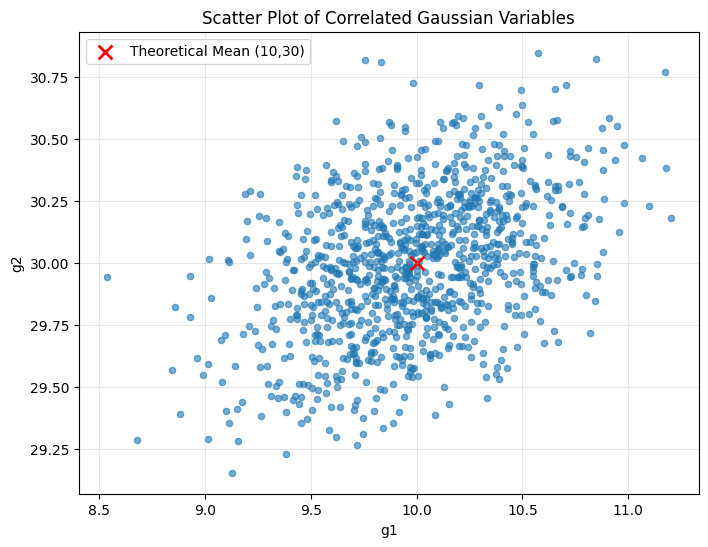

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

g1_samples = X[0, :]
g2_samples = X[1, :]

# Calculate sample statistics
sample_mean_g1 = np.mean(g1_samples)
sample_mean_g2 = np.mean(g2_samples)
sample_std_g1 = np.std(g1_samples)
sample_std_g2 = np.std(g2_samples)
sample_corr = np.corrcoef(g1_samples, g2_samples)[0, 1]

params_comparison = pd.DataFrame({
    'Parameter': ['μ₁', 'μ₂', 'σ₁', 'σ₂', 'ρ'],
    'Theoretical': [10, 30, 0.4, 0.3, 0.35],
    'Sample': [sample_mean_g1, sample_mean_g2, sample_std_g1, sample_std_g2, sample_corr]
})
print("Parameter Comparison:")
print(params_comparison.round(3))

plt.figure(figsize=(8, 6))
plt.scatter(g1_samples, g2_samples, alpha=0.6, s=20)
plt.xlabel('g1')
plt.ylabel('g2')
plt.title('Scatter Plot of Correlated Gaussian Variables')
plt.grid(True, alpha=0.3)
plt.scatter(10, 30, color='red', s=100, marker='x', linewidth=2, label='Theoretical Mean (10,30)')
plt.legend()
plt.show()


---

### 1. 多元高斯模拟的原理

- 对于两个相关的高斯随机变量，其联合分布由均值向量和协方差矩阵完全描述。

- 均值向量 $\mu=[10,30]^T$ 指定了每个变量的中心位置。

- 协方差矩阵 $\Sigma$ 捕获了变量间的方差和协方差：

$$
\Sigma=\begin{bmatrix}\sigma_1^2&\rho\sigma_1\sigma_2\\\rho\sigma_1\sigma_2&\sigma_2^2\end{bmatrix}=\begin{bmatrix}0.16&0.042\\0.042&0.09\end{bmatrix}
$$

- 模拟的关键是将独立标准高斯变量转换为相关高斯变量。Cholesky 分解是实现这一转换的常用方法。



### 2. Cholesky 分解的作用

- Cholesky 分解将协方差矩阵 $\Sigma$ 分解为一个下三角矩阵 $A$，使得 $\Sigma = AA^T$

- Cholesky 矩阵 $A$ 充当一个“变换矩阵”，将独立变量 $N$ 线性组合为相关变量 $X$。


---